# Perceptron Model in Python

In this notebook, we'll implement a single-layer perceptron with a sigmoid activation function. We'll train it on sample data from an unknown logical circuit, observe weight adjustments, and then make predictions on user-provided inputs.

In [7]:
import numpy as np

class Perceptron:
    def __init__(self):
        # Initialize weights randomly with mean 0
        self.synaptic_weights = 2 * np.random.random((3, 1)) - 1

    def sigmoid(self, x):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        """Derivative of the sigmoid function. Input x is assumed to be sigmoid(x)"""
        return x * (1 - x)

    def think(self, inputs):
        """Calculate the output of the perceptron for given inputs."""
        inputs = inputs.astype(float)
        output = self.sigmoid(np.dot(inputs, self.synaptic_weights))
        return output

    def train(self, inputs, targets, iterations):
        """Train the perceptron via backpropagation over a number of iterations."""
        for iteration in range(iterations):
            # Feed forward
            output = self.think(inputs)
            # Calculate error
            error = targets - output
            # Multiply error by derivative of sigmoid to get adjustments
            adjustments = np.dot(inputs.T, error * self.sigmoid_derivative(output))
            # Update weights
            self.synaptic_weights += adjustments

# Only run this when the script/notebook is executed directly
if __name__ == "__main__":
    # Training data: inputs and corresponding outputs
    training_inputs = np.array([
        [0, 0, 1],
        [1, 1, 1],
        [1, 0, 0],
        [0, 1, 1]
    ])
    training_outputs = np.array([[0, 1, 1, 0]]).T

    # Create a perceptron instance
    p = Perceptron()

    # Print initial random weights
    print("Random starting synaptic weights:")
    print(p.synaptic_weights)

    # Train the perceptron
    p.train(training_inputs, training_outputs, iterations=10000)

    # Print updated weights after training
    print("\nSynaptic weights after training:")
    print(p.synaptic_weights)

    # Prompt user for new input to make a prediction
    user_input = np.array(
        list(map(int, input("\nEnter 3 binary values for prediction (separated by spaces): ").split()))
    ).reshape(1, 3)

    # Predict and display the output
    output = p.think(user_input)
    print("\nPrediction for input {}: {}".format(user_input, output))


Random starting synaptic weights:
[[ 0.25074875]
 [-0.25372649]
 [-0.29030334]]

Synaptic weights after training:
[[ 9.15601519]
 [ 0.34135157]
 [-4.92041   ]]

Prediction for input [[0 1 1]]: [[0.01016027]]


# Feed-Forward Neural Network for MNIST Digit Recognition

A single hidden-layer network trained on a reduced MNIST dataset.

In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.inodes = input_nodes
        self.hnodes = hidden_nodes
        self.onodes = output_nodes
        self.lr = learning_rate

        # Weight matrices initialization
        self.W_ih = np.random.normal(0.0, 1/np.sqrt(self.inodes), (self.hnodes, self.inodes))
        self.W_ho = np.random.normal(0.0, 1/np.sqrt(self.hnodes), (self.onodes, self.hnodes))

    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))

    def sigmoid_derivative(self, y):
        return y * (1.0 - y)

    def train(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, dtype=float).reshape(self.inodes, 1)
        targets = np.array(targets_list, dtype=float).reshape(self.onodes, 1)

        # Forward pass
        hidden_inputs = self.W_ih @ inputs
        hidden_outputs = self.sigmoid(hidden_inputs)

        final_inputs = self.W_ho @ hidden_outputs
        final_outputs = self.sigmoid(final_inputs)

        # Error calculation
        output_errors = targets - final_outputs
        hidden_errors = self.W_ho.T @ output_errors

        # Backpropagation
        self.W_ho += self.lr * (output_errors * self.sigmoid_derivative(final_outputs)) @ hidden_outputs.T
        self.W_ih += self.lr * (hidden_errors * self.sigmoid_derivative(hidden_outputs)) @ inputs.T

    def think(self, inputs_list):
        inputs = np.array(inputs_list, dtype=float).reshape(self.inodes, 1)
        hidden_outputs = self.sigmoid(self.W_ih @ inputs)
        final_outputs = self.sigmoid(self.W_ho @ hidden_outputs)
        return final_outputs


## 1. Load and preprocess the data

In [9]:
# Load training data
with open('mnist_train_100.csv', 'r') as f:
# with open('mnist_train_full.csv', 'r') as f:
    training_data = f.readlines()

def normalize_input(values):
    arr = np.asarray(values, dtype=float)
    return arr / 255.0 * 0.98 + 0.01

train_inputs = []
train_targets = []

for line in training_data:
    parts = line.strip().split(',')
    label = int(parts[0])
    pixels = normalize_input(parts[1:])
    target = np.zeros(10) + 0.01
    target[label] = 0.99

    train_inputs.append(pixels)
    train_targets.append(target)


## 2. Initialize the network and train

In [10]:
# Hyperparameters
input_nodes = 784
hidden_nodes = 200
output_nodes = 10
learning_rate = 0.1
epochs = 5

# Initialize network
nn = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# Training
for e in range(epochs):
    for inputs, targets in zip(train_inputs, train_targets):
        nn.train(inputs, targets)
    print(f'Epoch {e+1}/{epochs} complete')

Epoch 1/5 complete
Epoch 2/5 complete
Epoch 3/5 complete
Epoch 4/5 complete
Epoch 5/5 complete


## 3. Test the network

In [12]:
    # Load test data
with open('mnist_test_10.csv', 'r') as f:
# with open('mnist_test_full.csv', 'r') as f:
    test_data = f.readlines()

# Evaluate performance
scores = []
for line in test_data:
    parts = line.strip().split(',')
    correct_label = int(parts[0])
    inputs = normalize_input(parts[1:])
    outputs = nn.think(inputs)
    predicted_label = np.argmax(outputs)
    scores.append(int(predicted_label == correct_label))

print(f'Performance: {np.mean(scores)*100:.2f}%')

Performance: 60.00%


## 4. Visualize a sample digit

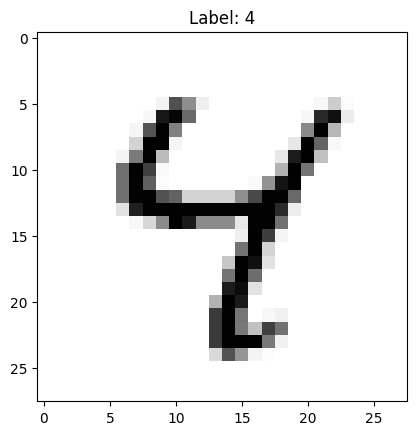

In [20]:
# Display the first test digit
my_var = random.randint(0, 9)
parts = test_data[my_var].strip().split(',')
label = int(parts[0])
pixels = np.asarray(parts[1:], dtype=float).reshape((28,28))
plt.imshow(pixels, cmap='Greys', interpolation='None')
plt.title(f'Label: {label}')
plt.show()